# Цель занятия
На этом занятии мы рассмотрим, как устроен градиентный спуск на примере реализации функционала ошибки MAE и MSE.

**Функция потерь (loss function)** в задачах регрессии используется для оценки того, насколько хорошо модель предсказывает целевую переменную. Функция потерь выражает разницу между предсказанными значениями и реальными значениями целевой переменной на конкретном обучающем примере.

В задачах регрессии наиболее популярные функции потерь - это квадратичная ошибка, абсолютная ошибка и функция потерь Хьюбера.

**Функционал ошибки (cost function)** - это математическая функция, которая измеряет среднюю ошибку модели на всем наборе данных. Функционал ошибки представляет собой сумму функции потерь на всех примерах обучающих данных, нормализованную на количество примеров в наборе данных. Функционал ошибки показывает, как хорошо модель работает на всех данных в целом и служит основной метрикой для оценки качества модели.

Основное отличие между функцией потерь и функционалом ошибки заключается в том, что функция потерь измеряет ошибку на каждом примере данных, в то время как функционал ошибки измеряет среднюю ошибку на всем наборе данных. В задачах регрессии наиболее популярные функционалы потерь - это среднеквадратичная ошибка (MSE), средняя абсолютная ошибка (MAE) и функционал ошибки Хьюбера.

**Градиентный спуск (Gradient Descent)** - это алгоритм оптимизации, который используется для нахождения локального минимума (или максимума) функции путём итеративного изменения значений её параметров. Он основывается на вычислении градиента (вектора частных производных) функции потерь по отношению к параметрам модели и изменении их значений в направлении антиградиента с определенным шагом (скоростью обучения). Таким образом, градиентный спуск позволяет модели подстроиться под данные и минимизировать значение функции потерь.

Более формально, градиентный спуск можно записать следующим образом:
```python
w = w - learning_rate * grad
```
Здесь w - вектор параметров модели, learning_rate - скорость обучения, grad - вектор градиента функции потерь по отношению к параметрам модели. Каждая компонента вектора grad соответствует частной производной функции потерь по соответствующему параметру.

Так как мы будем оптимизировать функцию только с одним аргументом, то будет использоваться не вектор частных производных, а непосредственно производная функции.

# Используемые библиотеки

**numpy**

**matplotlib**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
# plt.style.use("fivethirtyeight")

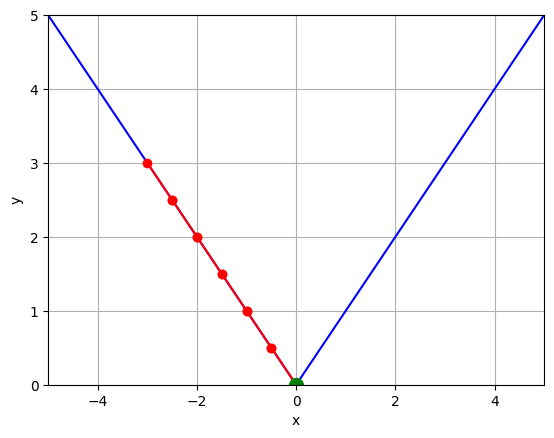

In [4]:
"""
Здесь функция abs_val определяет абсолютное значение, которое будем минимизировать, 
интервал поиска минимума задается с помощью функции np.linspace, 
начальное приближение задается переменной x0, 
параметры алгоритма (шаг и точность) задаются переменными alpha и eps соответственно. 
Затем запускается цикл, в котором вычисляется производная функции и новое приближение, 
отрезок между текущим и новым приближением рисуется на графике. 
Если разность между текущим и новым приближением меньше заданной точности eps, 
то цикл завершается и на графике рисуется точка минимума. 
Настройки графика (метки осей, границы и т.д.) задаются в конце кода с помощью функций 
plt.xlabel, plt.ylabel, plt.xlim, plt.ylim, plt.grid, 
после чего график выводится на экран с помощью функции plt.show.
"""


# Определяем функцию, которую будем минимизировать (абсолютное значение)
def abs_val(x):
    return abs(x)

# Задаем интервал поиска минимума
x = np.linspace(-5, 5, 100)

# Рисуем график функции
plt.plot(x, abs_val(x), 'b')

# Определяем начальное приближение
x0 = -3

# Определяем параметры алгоритма
alpha = 0.5
eps = 0.01

# Запускаем алгоритм
while True:
    if x0 > 0:
        grad = 1  # Градиент для x > 0
    elif x0 < 0:
        grad = -1  # Градиент для x < 0
    else:
        grad = 0  # Доопределяем градиент в точке 0
    x1 = x0 - alpha*grad  # Вычисляем новое приближение
    plt.plot([x0, x1], [abs_val(x0), abs_val(x1)], 'ro-')  # Рисуем отрезок
    if abs(x1 - x0) < eps:  # Проверяем условие выхода
        break
    x0 = x1

# Рисуем точку минимума
plt.plot(x1, abs_val(x1), 'go', markersize=10)

# Настраиваем оси и выводим график на экран
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-5, 5)
plt.ylim(0, 5)
plt.grid()
plt.show()

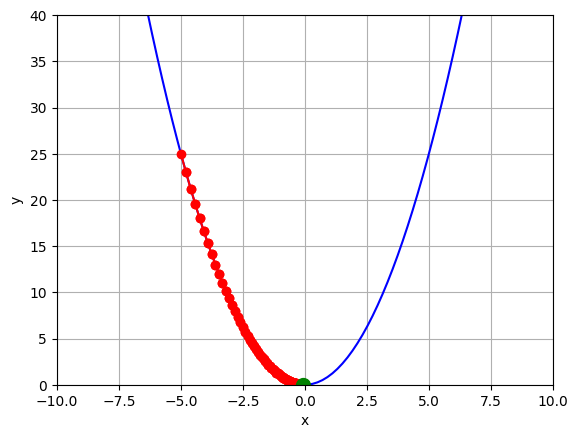

In [7]:
"""
Здесь функция parabola определяет параболу, которую будем минимизировать, 
интервал поиска минимума задается с помощью функции np.linspace, 
начальное приближение задается переменной x0, 
параметры алгоритма (шаг и точность) задаются переменными alpha и eps соответственно. 
Затем запускается цикл, в котором вычисляется производная функции и новое приближение, 
отрезок между текущим и новым приближением рисуется на графике. 
Если разность между текущим и новым приближением меньше заданной точности eps, 
то цикл завершается и на графике рисуется точка минимума. 
Настройки графика (метки осей, границы и т.д.) задаются в конце кода с помощью функций 
plt.xlabel, plt.ylabel, plt.xlim, plt.ylim, plt.grid, 
после чего график выводится на экран с помощью функции plt.show.
"""

# Определяем функцию, которую будем минимизировать (парабола)
def parabola(x):
    return (x)**2

# Задаем интервал поиска минимума
x = np.linspace(-10, 10, 100)

# Рисуем график функции
plt.plot(x, parabola(x), 'b')

# Определяем начальное приближение
x0 = -5

# Определяем параметры алгоритма
alpha = 0.02
eps = 1e-6

# Запускаем алгоритм
for i in range(100):
    grad = 2*(x0)  # Вычисляем градиент
    x1 = x0 - alpha*grad  # Вычисляем новое приближение
    plt.plot([x0, x1], [parabola(x0), parabola(x1)], 'ro-')  # Рисуем отрезок
    if abs(x1 - x0) < eps:  # Проверяем условие выхода
        break
    x0 = x1

# Рисуем точку минимума
plt.plot(x1, parabola(x1), 'go', markersize=10)

# Настраиваем оси и выводим график на экран
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-10, 10)
plt.ylim(0, 40)
plt.grid()
plt.show()
